<a href="https://colab.research.google.com/github/menguelx7/Diplodatos/blob/main/Analisis_Exploratorio_y_Curacion_de_Datos/Grupo_1_AyCD_Entregable_Parte_2_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Grupo 1
**Integrantes:** 


*   Ignacio Villagra
*   Laura Feu Marquestau
*   Marcelo Perea
*   Natalia Tassin
*   Matias Mengual



**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
import seaborn
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.datasets import fetch_california_housing
from sklearn import preprocessing

seaborn.set_context('talk')

Luego de haber completado el entregable 1, importamos el dataset previamente trabajado:

In [ ]:
# Se importa el dataset previamente trabajado en el entregable 1.
df_0 = pd.read_csv("https://raw.githubusercontent.com/menguelx7/Diplodatos/main/Analisis_Exploratorio_y_Curacion_de_Datos/melb_data_extended.csv")

df_0.info()  #Vemos cuales son las columnas que este dataframe posee a fin de 
#conocer qué tipo de variables tendremos en cada columna. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11854 entries, 0 to 11853
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Suburb                     11854 non-null  object 
 1   Address                    11854 non-null  object 
 2   Rooms                      11854 non-null  int64  
 3   Type                       11854 non-null  object 
 4   Price                      11854 non-null  float64
 5   Method                     11854 non-null  object 
 6   SellerG                    11854 non-null  object 
 7   Date                       11854 non-null  object 
 8   Distance                   11854 non-null  float64
 9   Postcode                   11854 non-null  float64
 10  Bedroom2                   11854 non-null  float64
 11  Bathroom                   11854 non-null  float64
 12  Car                        11854 non-null  float64
 13  Landsize                   11854 non-null  flo

In [ ]:
#Se realiza un describe del df_0 y se observa que la variable Bathroom = 0 es inconsistente,
# por lo tanto se le imputará un valor = 1 

df_0.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,zipcode,airbnb_price_mean,airbnb_price_median,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
count,11854.000000,1.185400e+04,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,6181.000000,7176.000000,11854.000000,11854.000000,11854.000000,11848.000000,11848.000000,11848.000000,11848.000000,11240.000000,10936.000000
mean,2.778387,1.028101e+06,9.308571,3096.531888,2.759997,1.448456,1.436646,519.158090,134.755730,1964.723384,-37.806710,144.990620,7468.065041,3096.559757,130.960608,88.073388,169.413319,710.613768,2627.226490
std,0.819015,5.693600e+05,4.506832,64.335054,0.814748,0.588423,0.720897,4155.924195,122.545452,36.629943,0.069955,0.091433,4391.526572,64.337922,62.048860,29.785645,288.857486,339.901505,1449.333835
min,1.000000,8.500000e+04,0.000000,3000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1850.000000,-38.027680,144.633020,389.000000,3000.000000,49.000000,37.500000,3.000000,160.000000,600.000000
25%,2.000000,6.380000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,154.000000,89.000000,1940.000000,-37.854237,144.929340,4380.000000,3044.000000,94.672646,69.000000,45.000000,469.866667,1567.500000
50%,3.000000,8.900000e+05,8.900000,3081.000000,3.000000,1.000000,1.000000,364.000000,120.000000,1970.000000,-37.801280,144.997200,6543.000000,3081.000000,114.612500,82.000000,76.000000,612.250000,2298.000000
75%,3.000000,1.291000e+06,12.400000,3146.000000,3.000000,2.000000,2.000000,624.000000,160.000000,2000.000000,-37.757200,145.051315,10331.000000,3146.000000,147.729515,101.000000,184.000000,920.078947,3374.900000
max,4.000000,9.000000e+06,23.000000,3752.000000,4.000000,3.000000,3.000000,433014.000000,6791.000000,2018.000000,-37.568570,145.302670,21650.000000,3752.000000,759.083333,180.000000,3367.000000,1984.375000,8634.200000


In [ ]:
#Se imputa la Variable Bathroom

df_0.loc[df_0.Bathroom<1,'Bathroom']=1

In [ ]:
df_0.describe() #comprobamos luego, que se haya solucionado este inconveniente

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,zipcode,airbnb_price_mean,airbnb_price_median,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
count,11854.000000,1.185400e+04,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,6181.000000,7176.000000,11854.000000,11854.000000,11854.000000,11848.000000,11848.000000,11848.000000,11848.000000,11240.000000,10936.000000
mean,2.778387,1.028101e+06,9.308571,3096.531888,2.759997,1.450818,1.436646,519.158090,134.755730,1964.723384,-37.806710,144.990620,7468.065041,3096.559757,130.960608,88.073388,169.413319,710.613768,2627.226490
std,0.819015,5.693600e+05,4.506832,64.335054,0.814748,0.584599,0.720897,4155.924195,122.545452,36.629943,0.069955,0.091433,4391.526572,64.337922,62.048860,29.785645,288.857486,339.901505,1449.333835
min,1.000000,8.500000e+04,0.000000,3000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1850.000000,-38.027680,144.633020,389.000000,3000.000000,49.000000,37.500000,3.000000,160.000000,600.000000
25%,2.000000,6.380000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,154.000000,89.000000,1940.000000,-37.854237,144.929340,4380.000000,3044.000000,94.672646,69.000000,45.000000,469.866667,1567.500000
50%,3.000000,8.900000e+05,8.900000,3081.000000,3.000000,1.000000,1.000000,364.000000,120.000000,1970.000000,-37.801280,144.997200,6543.000000,3081.000000,114.612500,82.000000,76.000000,612.250000,2298.000000
75%,3.000000,1.291000e+06,12.400000,3146.000000,3.000000,2.000000,2.000000,624.000000,160.000000,2000.000000,-37.757200,145.051315,10331.000000,3146.000000,147.729515,101.000000,184.000000,920.078947,3374.900000
max,4.000000,9.000000e+06,23.000000,3752.000000,4.000000,3.000000,3.000000,433014.000000,6791.000000,2018.000000,-37.568570,145.302670,21650.000000,3752.000000,759.083333,180.000000,3367.000000,1984.375000,8634.200000


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `np.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de np subyacente a un DataFrame.


Aca se puede ver que en Address tenemos al rededor de 12000 variables distintas, lo que va a influir enormemente en el tamaño de la matriz OHE. 
Más adelante se puede ver que si se agrega Address la matriz pesa cerca de 500 Mb, mientras que si no tiene esta columna, queda en solamente 23 Mb.
Si desea tener una matriz con un peso aun más reducido se pueden prescidir de variables como por ejemplo "SellerG" ya que se estima que esta columna no es relevante. Tampoco se considera la columna CouncilArea para el análisis.

In [ ]:
print(df_0.nunique())
#De las columnas anteriores vemos que las variables categoricas son las siguientes
categoric_col=["Suburb","Type", "Method","Regionname"]

#y las variables discretas, acotadas a un numero reducido de variables son las siguientes. Las variables numéricas continuas no son consideradas en este apartado
#dado que los métodos de Encoding no performan correctamente para ese tipo de variables.
numeric_col=["Rooms","Postcode","Bedroom2","Bathroom","Car"]


Suburb                         246
Address                      11694
Rooms                            4
Type                             3
Price                         2040
Method                           5
SellerG                        235
Date                            58
Distance                       154
Postcode                       145
Bedroom2                         4
Bathroom                         3
Car                              4
Landsize                      1351
BuildingArea                   505
YearBuilt                      137
CouncilArea                     27
Lattitude                     5601
Longtitude                    6079
Regionname                       6
Propertycount                  243
zipcode                        143
airbnb_price_mean              143
airbnb_price_median             77
airbnb_record_count            100
airbnb_weekly_price_mean       116
airbnb_monthly_price_mean      114
dtype: int64


Realizamos la extracción de las variables YearBuilt y BuildingArea.
A continuación armamos el DF con los datos que son unicamente de nuestro interes.

In [ ]:
#Tal como se pide desde un principio, quitaremos BuildingArea y YearBuilt
melb_df=df_0.drop('YearBuilt',axis=1)
melb_df=melb_df.drop('BuildingArea',axis=1)
list(melb_df) #aqui se ven que quitaron las columnas que queriamos
OHE_melb_df=melb_df[categoric_col+numeric_col] #armamos un dataset con las categorias que nos interesan

In [ ]:
#Volvemos a confirmar qué variables son de nuestro interés y cuántos valores distintos hay
OHE_melb_df.nunique()

Suburb        246
Type            3
Method          5
Regionname      6
Rooms           4
Postcode      145
Bedroom2        4
Bathroom        3
Car             4
dtype: int64

In [ ]:
# Vemos si existen valores nulos. 
OHE_melb_df.isna().sum()

Suburb        0
Type          0
Method        0
Regionname    0
Rooms         0
Postcode      0
Bedroom2      0
Bathroom      0
Car           0
dtype: int64

Probamos con aplicar la primer opción One Hot Encoder 
En este caso vemos que hay 420 columnas porque asigna un valor "1" a cada variable distinta, que encuentra en cada columna del dataset. Sin importar que las variables sean numéricas o categóricas puras. 
Se verá en la opción 2 que DictVectorizer toma las variables numéricas (discretas) y no las separa en distintas columnas, solo dejando una unica columna con los valores de dicha variable. Esto tiene la ventaja de que la matriz obtenida es más compacta y eficiente en cuanto espacio de memoria.

In [ ]:
#One hot encoder compacto - Opcion 1 
encoder= OneHotEncoder(sparse=False) #Sparse=False nos aseguramos que la matriz sea densa
encoder.fit(melb_df[categoric_col])
categoric_OHE=encoder.transform(melb_df[categoric_col])
encoder.fit(melb_df[numeric_col])
numeric_OHE=encoder.transform(melb_df[numeric_col])
Dense_df=np.hstack((categoric_OHE,numeric_OHE))
print(Dense_df)
print(Dense_df.shape)
print(type(Dense_df))


[[1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
(11854, 420)
<class 'numpy.ndarray'>


Aplicacion de DictVectorizer - Opcion2 
Como se puede ver de 420 columnas de la opcion 1 , ahora obtenemos 265 columnas con la opción 2.

In [ ]:
feature_dict = list(OHE_melb_df.T.to_dict().values())
print(feature_dict[:2])
#Se obtiene la matriz del DictVectorizer: feature_matrix
vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)
#print("La feature_matrix es", feature_matrix)
print("El tamaño es", feature_matrix.shape)


[{'Suburb': 'Abbotsford', 'Type': 'h', 'Method': 'S', 'Regionname': 'Northern Metropolitan', 'Rooms': 2, 'Postcode': 3067.0, 'Bedroom2': 2.0, 'Bathroom': 1.0, 'Car': 1.0}, {'Suburb': 'Abbotsford', 'Type': 'h', 'Method': 'S', 'Regionname': 'Northern Metropolitan', 'Rooms': 2, 'Postcode': 3067.0, 'Bedroom2': 2.0, 'Bathroom': 1.0, 'Car': 0.0}]
El tamaño es (11854, 265)


Con el comando "#vec.get_feature_names()" podemos ver enlistadas todas las columnas que generó el DirectVectorizer, donde se separó cada subcategoría.

In [ ]:
#vec.get_feature_names()


Procedemos a calcular el tamaño de las dos matrices, de la opcion 1 y la 2. Se puede ver que para la opcion 2 el espacio ocupado por la matriz es un 37 % menor que la de la opcion 1 

In [ ]:
matrix_size_mb = Dense_df.shape[0] * Dense_df.shape[1] * 4 / 1024 / 1024 #tamaño de la matriz obtenida por la opcion 1
print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_mb))
matrix_size_mb = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024 #tamaño de la matriz obtenida por la opcion 2
print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_mb))


The dense matrix will weight approximately 18.99 MB
The dense matrix will weight approximately 11.98 MB


El tamaño de la matriz del DictVectorizer es lo suficientemente pequeña como para que no sea necesario reducir su tamaño o modificarla. Por lo que se seguirá trabajando con esta matríz

In [ ]:
limit_size_mb = 15
 #En caso de que la matriz fuera de un tamaño superior a 15 MB, utilizariamos el siguiente codigo
precision_type = np.float32
if matrix_size_mb < limit_size_mb:
  dense_feature_matrix = feature_matrix.astype(precision_type).todense()
else:
  # We calculate how many rows would fit given the number of columns
  n_rows = int(limit_size_mb *1024 * 1024 / 4 / feature_matrix.shape[1])
  print("Matrix too big! Using only first {} of {} rows".format(
      n_rows, feature_matrix.shape[0]))
  dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense()

print("Final size: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))
# Remember to cut your original data as well.
if dense_feature_matrix.shape[0] < len(melb_df):
  melb_df_sample = melb_df.iloc[:dense_feature_matrix.shape[0]]
else:#
  melb_df_sample = melb_df
#Como la matriz es de un tamaño menor, no se ve alterada

Final size: 11.98


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

Con opcion 2  Llamando a la matriz densa del dictvectorizer, comenzamos por concatenar las columnas de YearBuilt, BuildingArea y Price, a la matriz densa. 
YearBuit, BuildingArea y Price son columnas de un dataset, mientras que Dense_df (el resultado de aplicar el OHE) es un array. Por lo que se pasa cada columna del df a un ndarray de numpy. En este caso el shape es (11854,)

Se escalaron las columnas del dataframe ya que existen diferencias significativas entre los ordenes de magnitud entre las columnas del DF, esto podría llevar a que ciertas columnas influyan más que otras debido a esta diferencia. El escalado lo que hará es simplemente poner a todas las columnas dentro de un mismo rango para que no exista esta posibilidad de error. 

In [ ]:
Df_norm_knn=dense_feature_matrix.copy()

#Vamos a escalar por columnas, los componentes de la matriz densa. 
scaler = MinMaxScaler()
print(scaler.fit(Df_norm_knn))
scaled_array=scaler.transform(Df_norm_knn)
print(scaled_array)
scaled_Dense_knn_op2_df=pd.DataFrame(scaled_array, columns=vec.get_feature_names())
#a la matriz escalada la volvemos dataframe con sus categorias correspondientes
scaled_Dense_knn_op2_df.columns


MinMaxScaler()
[[0.         0.33333334 0.33333334 ... 1.         0.         0.        ]
 [0.         0.33333334 0.         ... 1.         0.         0.        ]
 [0.5        0.6666666  0.         ... 1.         0.         0.        ]
 ...
 [0.5        1.         0.6666667  ... 1.         0.         0.        ]
 [0.5        0.6666666  0.6666667  ... 1.         0.         0.        ]
 [0.         1.         0.33333334 ... 1.         0.         0.        ]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Index(['Bathroom', 'Bedroom2', 'Car', 'Method=PI', 'Method=S', 'Method=SA',
       'Method=SP', 'Method=VB', 'Postcode', 'Regionname=Eastern Metropolitan',
       ...
       'Suburb=Wheelers Hill', 'Suburb=Williams Landing',
       'Suburb=Williamstown', 'Suburb=Williamstown North', 'Suburb=Windsor',
       'Suburb=Yallambie', 'Suburb=Yarraville', 'Type=h', 'Type=t', 'Type=u'],
      dtype='object', length=265)

Luego vamos a ver si existen valores nulos dentro de esta matriz ya escalada.

In [ ]:
scaled_Dense_knn_op2_df.isna().sum()
#Por lo que se puede ver, no tenemos valores nulos

Bathroom             0
Bedroom2             0
Car                  0
Method=PI            0
Method=S             0
                    ..
Suburb=Yallambie     0
Suburb=Yarraville    0
Type=h               0
Type=t               0
Type=u               0
Length: 265, dtype: int64

Del DF anterior ademas de agregar las dos columas de BuildingArea y Yearbuilt, volvemos a agregar las variables numericas continuas que nos eran de interés tales como Price, y los precios del DF de AirBnB.

In [ ]:
df_1 = df_0.loc[:,["BuildingArea",'YearBuilt','Price','airbnb_monthly_price_mean','airbnb_price_mean']]

df_melb_cured = pd.concat([scaled_Dense_knn_op2_df,df_1],axis=1)
#Estas ultimas cuatro columnas no estan normalizadas.

Corroboramos que ahora las nuevas columnas agregadas si tienen valores nulos, por lo que será necesario utilizar la función KNN para poder asignarle un valor.

In [ ]:
df_melb_cured.isna().sum()

Bathroom                        0
Bedroom2                        0
Car                             0
Method=PI                       0
Method=S                        0
                             ... 
BuildingArea                 5673
YearBuilt                    4678
Price                           0
airbnb_monthly_price_mean     918
airbnb_price_mean               6
Length: 270, dtype: int64

A continuación veremos en diferentes columnas cómo es la distribución de los valores faltantes en cada columna del dataset. En este caso se utilizó el dataset original ya que este no se encuentra aumentado en dimensiones al aplicar el ONE HOT ENCODER, por lo que es más facil para el lector comprender la información. 
Se puede ver que los datos faltantes de cada columna, aparecen de forma aleatoria, por lo que es conveniente utilizar KNN Regresor como método de estimación de los valores de los datos faltantes. 

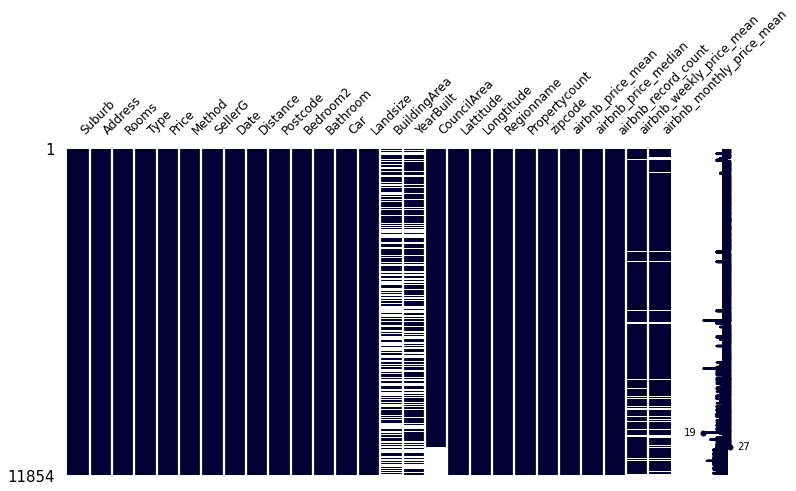

In [ ]:
msno.matrix(df_0,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

Aplicamos el imputador IterativeImputer con el estimador KNeighborsRegressor . 
Se lo aplica a las columnas YearBuilt, BuildingArea,airbnb_monthly_price_mean y airbnb_price_mean que eran las que presentaban mas #cantidad de datos faltantes

In [ ]:
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
 
df_melb_cured[['BuildingArea', 'YearBuilt', 'airbnb_monthly_price_mean' , 'airbnb_price_mean',]] = mice_imputer.fit_transform(
    df_melb_cured[['BuildingArea', 'YearBuilt', 'airbnb_monthly_price_mean' , 'airbnb_price_mean']])

#Y corroboramos que no hayan valores nulos 

pd.set_option('display.max_rows', None) 
df_melb_cured.isna().sum(axis=0) #luego se puede ver que no hay mas nan

In [ ]:
mice_imputer_1 = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_melb_cured_1 = pd.concat([scaled_Dense_knn_op2_df,df_1],axis=1) 
df_melb_cured_1 = mice_imputer.fit_transform(df_melb_cured_1)

#Y corroboramos que no hayan valores nulos 

pd.set_option('display.max_rows', None) 
df_melb_cured_1

array([[0.00000000e+00, 3.33333343e-01, 3.33333343e-01, ...,
        1.48000000e+06, 2.18703226e+03, 1.30624031e+02],
       [0.00000000e+00, 3.33333343e-01, 0.00000000e+00, ...,
        1.03500000e+06, 2.18703226e+03, 1.30624031e+02],
       [5.00000000e-01, 6.66666627e-01, 0.00000000e+00, ...,
        1.46500000e+06, 2.18703226e+03, 1.30624031e+02],
       ...,
       [5.00000000e-01, 1.00000000e+00, 6.66666687e-01, ...,
        1.24500000e+06, 1.90161111e+03, 1.24026455e+02],
       [5.00000000e-01, 6.66666627e-01, 6.66666687e-01, ...,
        1.03100000e+06, 2.11975000e+03, 1.91094595e+02],
       [0.00000000e+00, 1.00000000e+00, 3.33333343e-01, ...,
        1.28500000e+06, 2.96609091e+03, 1.35609756e+02]])

A continuación se grafican ambas curvas con datos curados y previos al aplicarles el método KNN


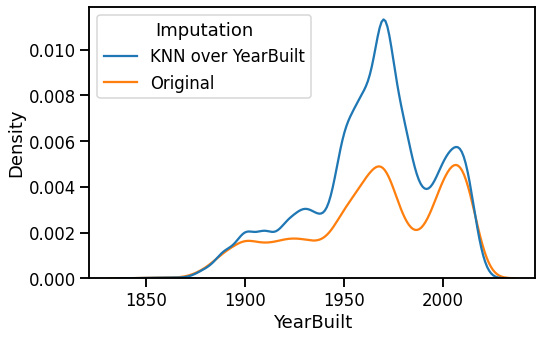

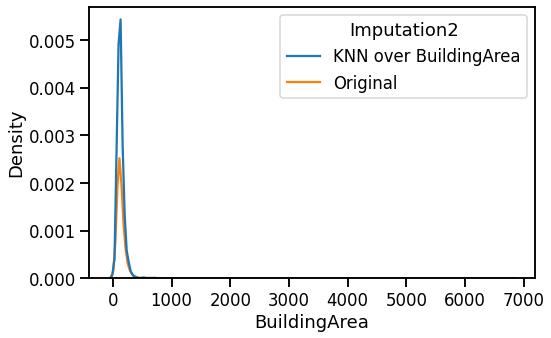

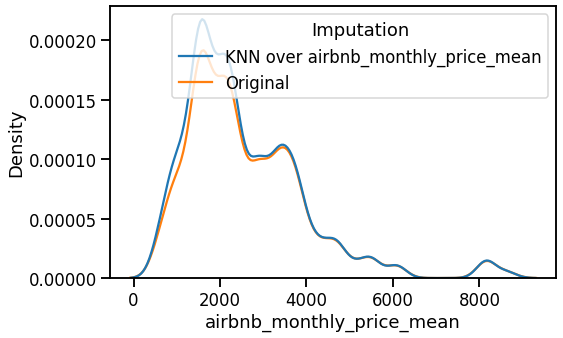

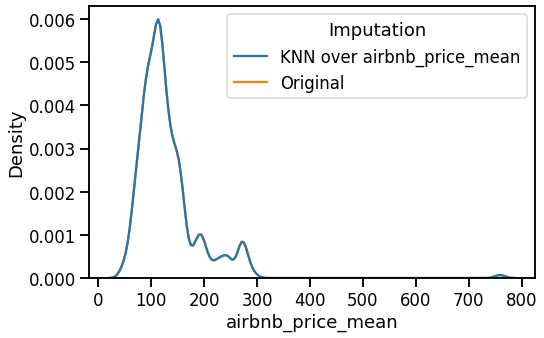

In [ ]:

mice_year_built = df_melb_cured.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt'
melb_year_build = df_0.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pd.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
data.reset_index(drop=False, inplace = True)
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

mice_building_area = df_melb_cured.BuildingArea.to_frame()
mice_building_area['Imputation2'] = 'KNN over BuildingArea'
melb_building_area2 = df_0.BuildingArea.dropna().to_frame()
melb_building_area2['Imputation2'] = 'Original'
data2 = pd.concat([mice_building_area, melb_building_area2])
fig2 = plt.figure(figsize=(8, 5))
data2.reset_index(drop=False, inplace = True)
g2 = seaborn.kdeplot(data=data2, x='BuildingArea', hue='Imputation2')

mice_airbnb_monthly_price_mean = df_melb_cured.airbnb_monthly_price_mean.to_frame()
mice_airbnb_monthly_price_mean['Imputation'] = 'KNN over airbnb_monthly_price_mean'
melb_airbnb_monthly_price_mean = df_0.airbnb_monthly_price_mean.dropna().to_frame()
melb_airbnb_monthly_price_mean['Imputation'] = 'Original'
data3 = pd.concat([mice_airbnb_monthly_price_mean, melb_airbnb_monthly_price_mean])
fig3 = plt.figure(figsize=(8, 5))
data3.reset_index(drop=False, inplace = True)
g3 = seaborn.kdeplot(data=data3, x='airbnb_monthly_price_mean', hue='Imputation')

mice_airbnb_price_mean = df_melb_cured.airbnb_price_mean.to_frame()
mice_airbnb_price_mean['Imputation'] = 'KNN over airbnb_price_mean'
melb_airbnb_price_mean = df_0.airbnb_price_mean.dropna().to_frame()
melb_airbnb_price_mean['Imputation'] = 'Original'
data4 = pd.concat([mice_airbnb_price_mean, melb_airbnb_price_mean])
fig4 = plt.figure(figsize=(8, 5))
data4.reset_index(drop=False, inplace = True)
g4 = seaborn.kdeplot(data=data4, x='airbnb_price_mean', hue='Imputation')

In [ ]:
df_melb_cured.describe()

,Bathroom,Bedroom2,Car,Method=PI,Method=S,Method=SA,Method=SP,Method=VB,Postcode,Regionname=Eastern Metropolitan,...,Suburb=Yallambie,Suburb=Yarraville,Type=h,Type=t,Type=u,BuildingArea,YearBuilt,Price,airbnb_monthly_price_mean,airbnb_price_mean
count,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,...,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,1.185400e+04,11854.000000,11854.000000
mean,0.225409,0.586666,0.478882,0.111439,0.670913,0.006496,0.124431,0.086722,0.128367,0.102666,...,0.001687,0.012823,0.656825,0.091783,0.251392,129.297347,1964.206141,1.028101e+06,2556.332991,130.951744
std,0.292299,0.271583,0.240299,0.314688,0.469902,0.080337,0.330086,0.281439,0.085552,0.303535,...,0.041043,0.112514,0.474789,0.288732,0.433832,94.211741,31.353884,5.693600e+05,1427.468817,62.034405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1850.000000,8.500000e+04,600.000000,49.000000
25%,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.058511,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,89.600000,1950.000000,6.380000e+05,1554.333333,94.672646
50%,0.000000,0.666667,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.107713,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,120.200000,1970.000000,8.900000e+05,2187.032258,114.612500
75%,0.500000,0.666667,0.666667,0.000000,1.000000,0.000000,0.000000,0.000000,0.194149,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,151.200000,1983.800000,1.291000e+06,3366.666667,147.729515
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,6791.000000,2018.000000,9.000000e+06,8634.200000,759.083333


## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

# EJERCICIO 3

Para aplicar PCA siempre es necesario estandarizar previamente las variables de la matriz, ya que el procedimiento identifica las variables con mayor varianza y, si no están estandarizadas, las de mayor varianza dominarán al resto.
En el ejercicio anterior ya se estandarizó la matriz.
from sklearn.preprocessing import MinMaxScaler esta función "normaliza" entre -1 y 1
scaler = MinMaxScaler(feature_range=(-1, 1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


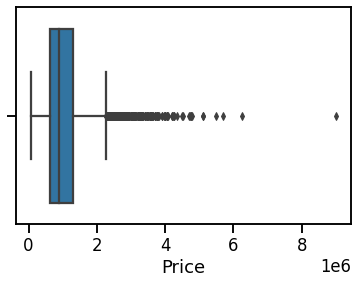

In [ ]:


scaled_dense_feature_matrix = scaler.fit_transform(dense_feature_matrix)
#np.max(scaled_dense_feature_matrix), np.min(scaled_dense_feature_matrix)

#Luego de normalizada, se aplica el modulo de PCA de sklearn 
from sklearn.decomposition import PCA
#n = min(20, x.shape[0])
#pca = PCA(n)
pca = PCA(n_components=20)#ponemos 20 componentes 
pca.fit(scaled_dense_feature_matrix)
proyected_features = pca.transform(scaled_dense_feature_matrix)
proyected_features.shape
pca.explained_variance_ratio_
melb_df_sample[['pca1_scaled', 'pca2_scaled']] = proyected_features[:,:2]

seaborn.boxplot(melb_df_sample.Price)

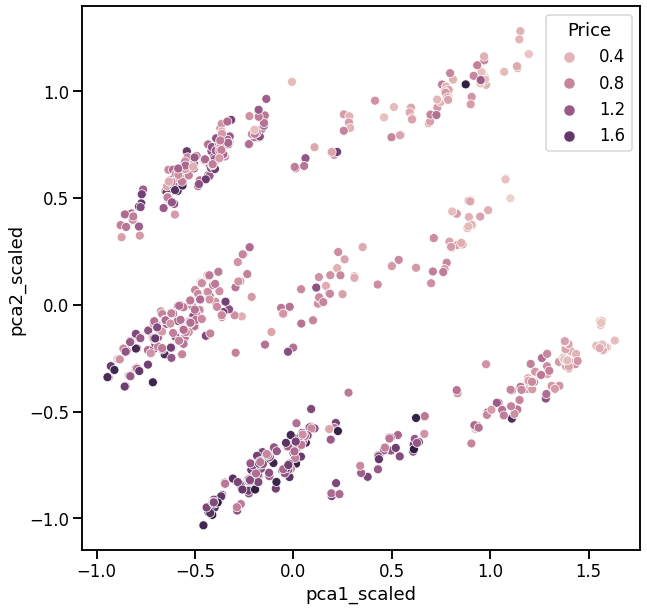

In [ ]:
data = melb_df_sample[melb_df_sample.Price < 2000000].sample(1000)
fig = plt.figure(figsize=(10, 10))
seaborn.scatterplot(data=data, x='pca1_scaled', y='pca2_scaled',
                    hue='Price')  # 'Landsize' 'Price' 'YearBuilt'

In [ ]:
# TODO Here we have to pre-process the matrix before applying PCA
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
stdandard_dense_feature_matrix = std_scaler.fit_transform(dense_feature_matrix)
np.max(stdandard_dense_feature_matrix), np.min(stdandard_dense_feature_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(108.87148, -2.1714644)

In [ ]:
from sklearn.decomposition import PCA
pca_std = PCA(n_components=15)
pca_std.fit(stdandard_dense_feature_matrix)
proyected_features_std = pca.transform(stdandard_dense_feature_matrix)
proyected_features_std.shape

(11854, 20)

In [ ]:
pca_std.explained_variance_ratio_

array([0.01482614, 0.01235385, 0.00905745, 0.0078822 , 0.00759571,
       0.00753119, 0.00686185, 0.00568468, 0.00451961, 0.00423976,
       0.00415835, 0.00412387, 0.00401665, 0.00389248, 0.0038083 ],
      dtype=float32)

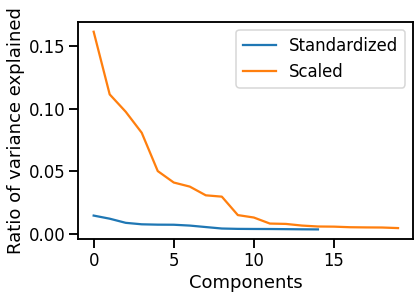

In [ ]:
seaborn.lineplot(x=range(pca_std.n_components),
                 y=pca_std.explained_variance_ratio_, label='Standardized')
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_, label='Scaled')
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")
plt.legend()

In [ ]:
#data = melb_df_sample.sample(1000)
#fig = plt.figure(figsize=(10, 10))
#seaborn.scatterplot(data=data, x='pca1_standard', y='pca2_standard',
#                    hue='Price')  # 'Landsize' 'Price' 'YearBuilt'

In [ ]:
#Debido a que las variables numéricas de df_melb_cured ya habían sido escaladas. 
#Las únicas variables a escalar del df resultante: melb_data_mice son 'YearBuilt','BuildingArea'


YearBuilt = df_melb_cured.YearBuilt.values.copy().reshape(-1,1)

BuildingArea =df_melb_cured.BuildingArea.values.copy().reshape(-1,1)


#Se emplea MinMaxscaler

YearBuilt_scaled =MinMaxScaler().fit_transform(YearBuilt)

BuildingArea_scaled =MinMaxScaler().fit_transform(BuildingArea)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Scaled data: BuildingArea')

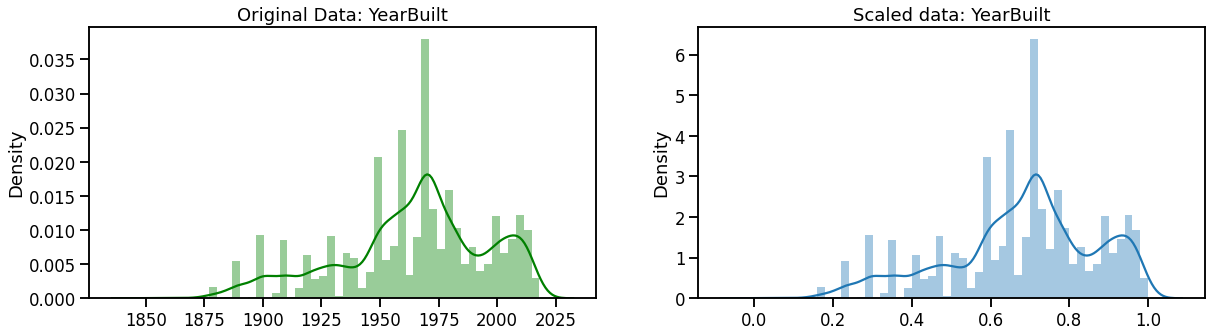

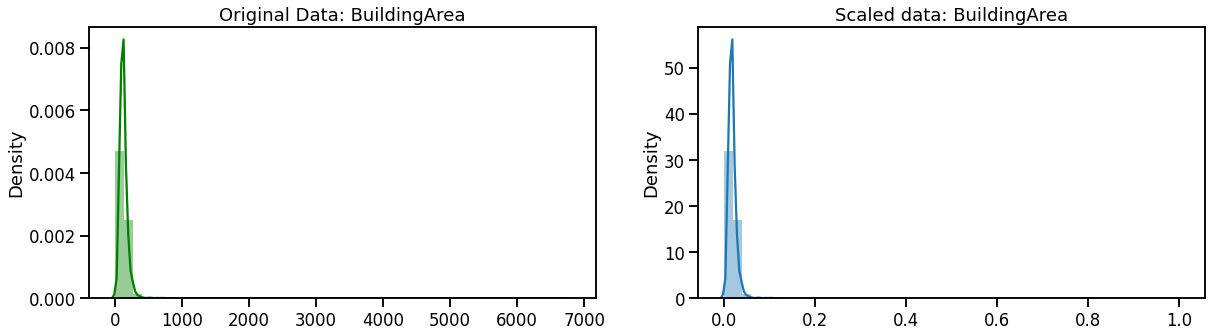

In [ ]:
# Se Plotea para comparar cada una de las variables numéricas antes y después de escalar

fig, ax=plt.subplots(1,2,figsize=(20,5))
seaborn.distplot(YearBuilt, ax=ax[0],color='Green')
ax[0].set_title("Original Data: YearBuilt")

seaborn.distplot(YearBuilt_scaled, ax=ax[1])
ax[1].set_title("Scaled data: YearBuilt")

fig, ax=plt.subplots(1,2,figsize=(20,5))
seaborn.distplot(BuildingArea, ax=ax[0],color='Green')
ax[0].set_title("Original Data: BuildingArea")

seaborn.distplot(BuildingArea_scaled, ax=ax[1])
ax[1].set_title("Scaled data: BuildingArea")

In [ ]:
#Se ha decidido entonces escalar el Dataframe. A continuación se entrena la instancia de clase PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_melb_cured)
print("Principal components")
print(pca.components_)
print("Explained variance: ")
print(pca.explained_variance_)
print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Principal components
[[ 2.06554704e-07  2.27167930e-07  9.13150704e-08 -3.09365929e-09
   6.17308660e-08 -2.07108545e-10 -6.06600129e-08  2.22991472e-09
   3.74963386e-08  1.10643575e-08 -1.36738132e-07 -2.99190697e-10
   4.91866423e-10  2.53727480e-07 -1.28246381e-07  2.34205171e-07
   4.70232942e-10  3.68903580e-10 -4.48527136e-09 -7.66737707e-10
   1.52032579e-08 -4.42793464e-09  2.22386106e-09 -4.12481065e-09
  -5.56452724e-10 -2.92024840e-09 -2.81674186e-10  7.68614438e-09
  -6.97690068e-10  8.59283902e-09  1.45430522e-09  5.16325593e-11
  -1.48710466e-10 -1.01005007e-10 -4.03864368e-09 -2.13203530e-09
   9.90295371e-09  2.09701493e-08  1.82118331e-09 -7.88838500e-10
   5.26925788e-09  2.02778481e-09  3.19724400e-10  9.53876895e-10
   3.84885822e-10  1.61821614e-10  2.80161187e-09 -3.91528083e-09
  -6.12200174e-10  2.98118423e-08  1.19172676e-08 -2.21073859e-09
  -8.88198439e-10 -2.33692076e-09 -2.26649924e-09 -5.41728649e-09
   1.75276051e-09 -1.86920847e-09  3.89159715e-10 -2.13

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

#Resolucion punto 4

In [ ]:
n_dim = min(20, df_melb_cured.shape[0])
pca = PCA(n_dim)
melb_dim_transform = pca.fit_transform(df_melb_cured)

In [ ]:
n_pca = 3
melb_pca = melb_dim_transform[:, 0:n_pca]

In [ ]:
melb_extended_pca = np.hstack([df_melb_cured, melb_pca])

new_pca_cols = [f'pca{i}' for i in range(1, n_pca + 1)]
all_columns = [col_name.lower() for col_name in df_melb_cured.columns.to_list()] + new_pca_cols
melb_extended_pca_df = pd.DataFrame(data=melb_extended_pca, columns=all_columns)

In [ ]:
melb_extended_pca_df[:10]

,bathroom,bedroom2,car,method=pi,method=s,method=sa,method=sp,method=vb,postcode,regionname=eastern metropolitan,...,type=t,type=u,buildingarea,yearbuilt,price,airbnb_monthly_price_mean,airbnb_price_mean,pca1,pca2,pca3
0,0.0,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,0.089096,0.0,...,0.0,0.0,103.8,1927.6,1480000.0,2187.032258,130.624031,451898.537396,-621.381586,-48.691596
1,0.0,0.333333,0.000000,0.0,1.0,0.0,0.0,0.0,0.089096,0.0,...,0.0,0.0,79.0,1900.0,1035000.0,2187.032258,130.624031,6898.606761,-372.698165,-55.296604
2,0.5,0.666667,0.000000,0.0,0.0,0.0,1.0,0.0,0.089096,0.0,...,0.0,0.0,150.0,1900.0,1465000.0,2187.032258,130.624031,436898.542039,-613.328273,-2.707705
3,0.5,0.666667,0.333333,1.0,0.0,0.0,0.0,0.0,0.089096,0.0,...,0.0,0.0,103.8,1927.6,850000.0,2187.032258,130.624031,-178101.363653,-269.572188,-21.946744
4,0.0,0.666667,0.666667,0.0,0.0,0.0,0.0,1.0,0.089096,0.0,...,0.0,0.0,142.0,2014.0,1600000.0,2187.032258,130.624031,571898.518641,-688.684998,-13.319888
5,0.0,0.333333,0.000000,0.0,1.0,0.0,0.0,0.0,0.089096,0.0,...,0.0,0.0,103.8,1927.6,941000.0,2187.032258,130.624031,-87101.377946,-320.389083,-25.810572
6,0.5,1.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.089096,0.0,...,0.0,0.0,210.0,1910.0,1876000.0,2187.032258,130.624031,847898.479701,-843.272123,39.983849
7,0.0,0.333333,0.666667,0.0,1.0,0.0,0.0,0.0,0.089096,0.0,...,0.0,0.0,107.0,1890.0,1636000.0,2187.032258,130.624031,607898.513640,-708.510538,-53.143686
8,0.0,0.000000,0.333333,0.0,1.0,0.0,0.0,0.0,0.089096,0.0,...,0.0,1.0,103.8,1927.6,300000.0,2187.032258,130.624031,-728101.277269,37.563251,1.399610
9,0.0,0.666667,0.666667,0.0,1.0,0.0,0.0,0.0,0.089096,0.0,...,0.0,0.0,75.0,1900.0,1097000.0,2187.032258,130.624031,68898.596864,-407.292196,-61.919312


In [ ]:
melb_extended_pca_df.columns

Index(['bathroom', 'bedroom2', 'car', 'method=pi', 'method=s', 'method=sa',
       'method=sp', 'method=vb', 'postcode', 'regionname=eastern metropolitan',
       ...
       'type=t', 'type=u', 'buildingarea', 'yearbuilt', 'price',
       'airbnb_monthly_price_mean', 'airbnb_price_mean', 'pca1', 'pca2',
       'pca3'],
      dtype='object', length=273)

In [ ]:
melb_extended_pca_df.to_csv('melb_pca_extended.csv')

In [ ]:
## Small example

## If we process our data with the following steps:
#categorical_cols = ["Suburb","Type", "Method","Regionname"]
#numerical_cols =["Rooms","Postcode","Bedroom2","Bathroom","Car","YearBuilt","BuildingArea","Price"]
#new_columns = []

# Step 1: encode categorical columns
#encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
#X_cat = encoder.fit_transform(melb_df[categorical_cols])
#for col, col_values in zip(categorical_cols, encoder.categories_):
#  for col_value in col_values:
#    new_columns.append('{}={}'.format(col, col_value))
#print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
#X = np.hstack([X_cat, df_0[numerical_cols].values])
#new_columns.extend(numerical_cols)
#print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
#pca = PCA(n_components=2)
#pca_dummy_features = pca.fit_transform(X)
#X_pca = np.hstack([X, pca_dummy_features])
#new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
#processed_melb_df = pd.DataFrame(data=X_pca, columns=new_columns)
#processed_melb_df.head()

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
